Imports

In [4]:
from IPython.display import Markdown as md, display
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning
from RhythmCount import data_processing as dproc
from RhythmCount import plot

import warnings

# ignore these warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=HessianInversionWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Cleaning and analysing the raw data

Southern Ring Road of Ljubljana  Var:  3374499.8176657874  Mean:  3057.687174541948


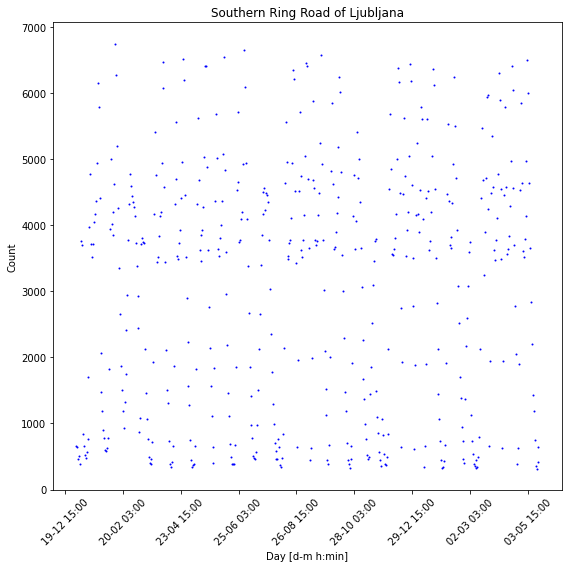

In [5]:
df = pd.read_csv(r'data\supp_file_0.csv')
df = dproc.clean_data(df)
plot.plot_raw_data(df, "Southern Ring Road of Ljubljana", 1500,save_file_to='supp_file_0_raw.pdf')

# Building models

In [6]:
models_type = ['poisson', 'zero_poisson', 'gen_poisson', 'nb', 'zero_nb']
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

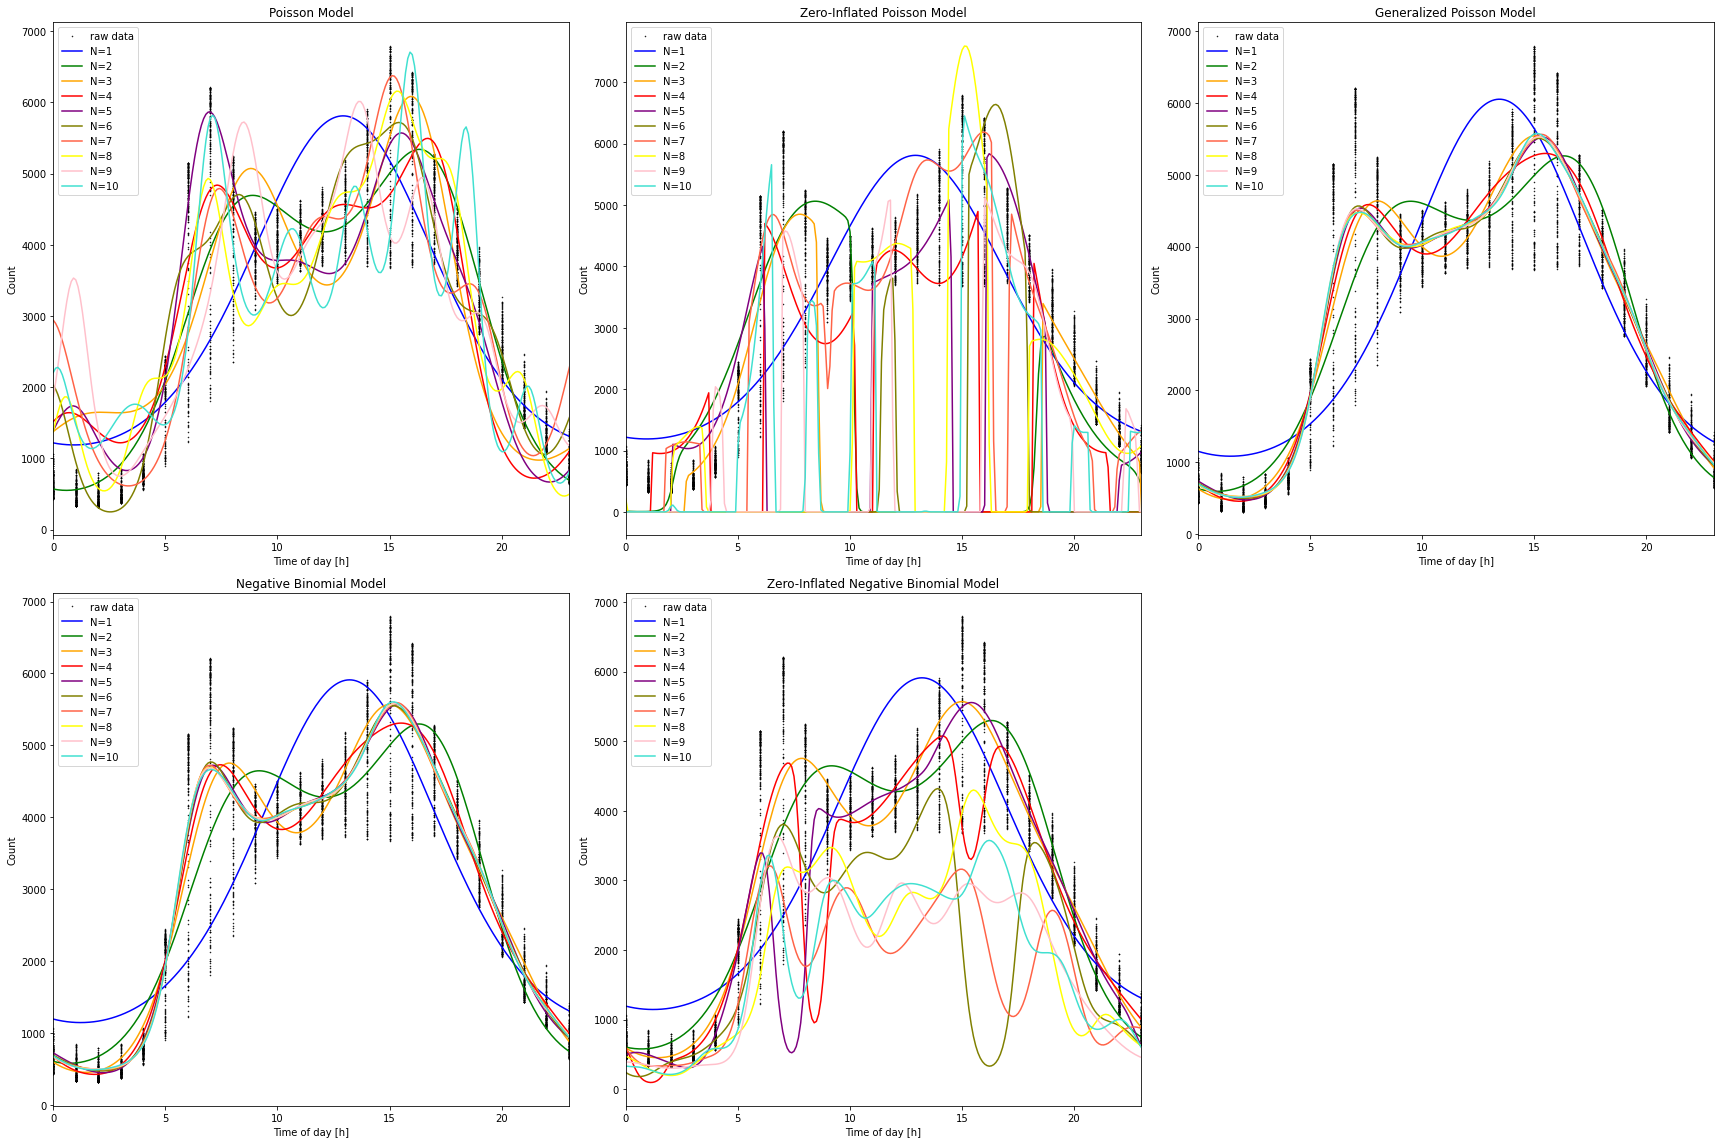

,model_type,n_components,amplitude,mesor,peaks,heights,llr_pvalue,RSS,AIC,BIC,log_likelihood,logs,mean(est),Y(est),X_test,Y_test
0,poisson,1.0,2310.54,3499.23,[12.91],[5809.77],0.0,6.362619e+09,2.203995e+06,2.204014e+06,-1.101994e+06,"[-144.59713541494375, -173.53495101465296, -39...",3057.620620,"[1188.8347200697049, 1226.1294089421456, 1332....","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1216.6987367192212, 1210.9481858920794, 1205...."
1,poisson,2.0,2394.40,2944.97,"[8.91, 16.32]","[4693.3, 5339.37]",0.0,2.812110e+09,9.105555e+05,9.105882e+05,-4.552727e+05,"[-12.627608722124478, -4.544606543997361, -145...",3057.730368,"[559.8745958094647, 663.7387179096863, 914.808...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[568.8963152647717, 563.0849741079613, 558.397..."
2,poisson,3.0,2553.28,3528.61,"[8.81, 15.92]","[5071.47, 6081.89]",0.0,5.190179e+09,2.272227e+06,2.272272e+06,-1.136106e+06,"[-348.1487725253346, -405.35268594016316, -604...",3056.904524,"[1580.213255109423, 1647.1666573262619, 1640.6...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1377.5429301410456, 1402.131816999017, 1426.1..."
3,poisson,4.0,2385.74,3108.04,"[7.31, 13.01, 16.72]","[4837.53, 4566.0, 5493.78]",0.0,3.874357e+09,1.958392e+06,1.958451e+06,-9.791869e+05,"[-372.2626177166003, -247.94651429017858, -318...",3055.653337,"[1621.246538080126, 1373.1143791723846, 1218.5...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1517.7994663845968, 1549.641989537944, 1577.2..."
4,poisson,5.0,2598.22,3265.88,"[7.01, 15.52]","[5864.1, 5570.54]",0.0,3.321464e+09,1.495688e+06,1.495760e+06,-7.478329e+05,"[-437.1734966692384, -187.0778220263196, -114....",3059.662989,"[1728.3966796072427, 1254.1624815321545, 850.2...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1392.02698751538, 1455.5108259559304, 1515.81..."
5,poisson,6.0,2734.34,2982.73,"[8.31, 15.42]","[4704.69, 5717.07]",0.0,3.267573e+09,1.249147e+06,1.249232e+06,-6.245606e+05,"[-53.80393256793286, -141.0284889246318, -43.0...",3056.654954,"[950.0830891269605, 307.9352825356589, 292.319...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[2023.860450655596, 1972.6109967687783, 1899.4..."
6,poisson,7.0,2880.35,3493.82,"[7.41, 15.12]","[4789.94, 6374.17]",0.0,4.932691e+09,2.124078e+06,2.124176e+06,-1.062024e+06,"[-554.630170220672, -66.53981133647312, -31.70...",3060.065124,"[1912.7391542641271, 966.8474566179855, 634.01...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[2939.4026996191983, 2896.4976296860627, 2832...."
7,poisson,8.0,2842.97,3313.83,"[6.91, 15.32, 17.22]","[4931.03, 6156.8, 5211.45]",0.0,3.640825e+09,1.505147e+06,1.505258e+06,-7.525565e+05,"[-314.5310284812431, -7.201294524106288, -113....",3059.369994,"[1521.6869377520825, 580.4789726589372, 849.28...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1373.0554927651867, 1512.0730219562884, 1639...."
8,poisson,9.0,2630.43,3381.12,"[8.51, 13.61, 16.42]","[5723.12, 6011.55, 4942.92]",0.0,7.312447e+09,2.709145e+06,2.709269e+06,-1.354553e+06,"[-1749.5451583849672, -270.79904169063275, -71...",3113.894933,"[3507.939122113199, 1415.4162953069479, 750.60...","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[1863.2984541281621, 2062.970536334271, 2284.2..."
9,poisson,10.0,3026.52,3678.16,"[7.11, 15.92, 18.42]","[5819.24, 6704.67, 5654.44]",0.0,6.044707e+09,2.471741e+06,2.471879e+06,-1.235849e+06,"[-288.8934516628183, -151.9134377875357, -589....",3010.262505,"[1475.8734489462518, 1179.8398694540285, 1619....","[0.0, 0.1001001001001001, 0.2002002002002002, ...","[2206.9183696878517, 2265.5764469419105, 2277...."


In [7]:
df_results = dproc.fit_to_models(df, models_type, n_components,save_file_to='supp_file_0_models.pdf')
df_results.to_csv(r'results\supp_file_0_results.csv')
display(df_results)

# Comparing the fitted models
## First compare by the model_type parameter

In [8]:
best_model_type = dproc.get_best_model_type(df_results, 'Vuong')
print("Best model: {}".format(best_model_type.model_type))
best_model = dproc.get_best_n_components(df_results, 'Vuong', model_type=best_model_type['model_type'])
print("Number of components: {}".format(best_model.n_components))

Best model: gen_poisson
Number of components: 9.0


## First compare by the n_components parameter

In [9]:
best_n_components = dproc.get_best_n_components(df_results, 'Vuong')
print("Number of components: {}".format(best_n_components.n_components))
best_model = dproc.get_best_model_type(df_results, 'Vuong', n_components=best_n_components['n_components'])
print("Best model: {}".format(best_model.model_type))

Number of components: 7.0
Best model: gen_poisson


We will use the result from the second comparison as the best model.

In [10]:
model_type = best_model.model_type
n_component = int(best_model.n_components)
print("Best model: {}  Number of components: {}".format(best_model.model_type,best_model.n_components))

Best model: gen_poisson  Number of components: 7.0


# Plot the model and its CIs

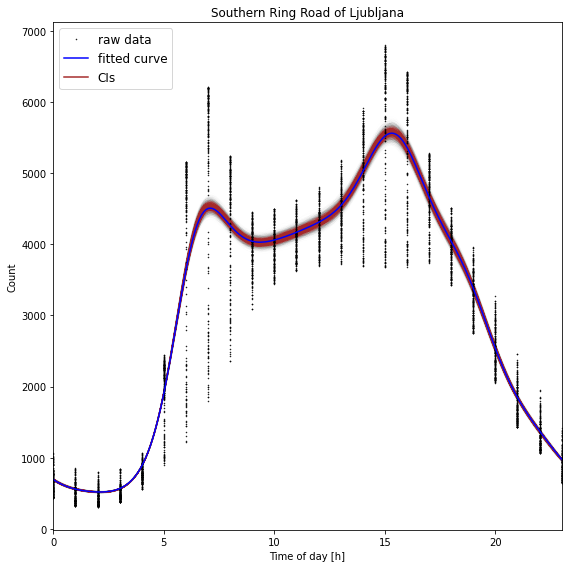

Confidence intervals of model:


,0,1
0,7.771731,7.776772
1,-0.307367,-0.296414
2,-0.989342,-0.978825
3,-0.233297,-0.226466
4,-0.380982,-0.363090
5,-0.188769,-0.174751
6,0.076955,0.089438
7,0.003694,0.017347
8,0.072904,0.086333
9,0.051180,0.064931


In [11]:
CIs=plot.plot_model(df, model_type, n_component, title='Southern Ring Road of Ljubljana',save_file_to='supp_file_0_model.pdf')
print('Confidence intervals of model:')
display(CIs)

# Plot only the CIs of the model

1


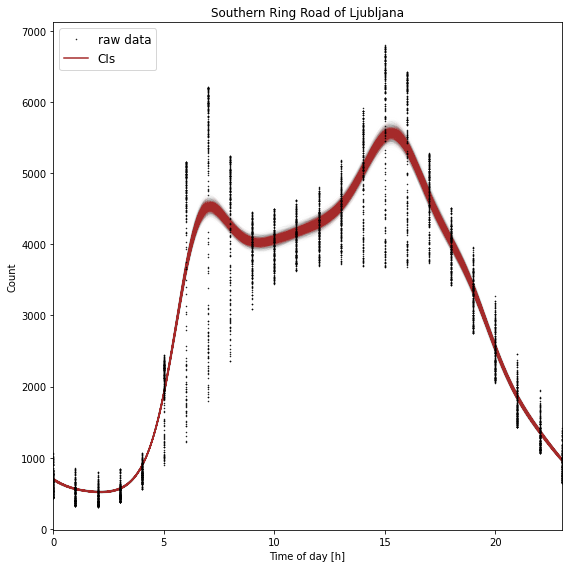

In [12]:
CIs=plot.plot_confidence_intervals(df, model_type, n_component, title='Southern Ring Road of Ljubljana',save_file_to='supp_file_0_CIs.pdf')
CIs.to_csv(r'results\supp_file_0_CIs.csv')

# Calculate the CIs of the rhythm parameters

In [13]:
CIs_params=dproc.calculate_confidence_intervals_parameters(df, n_component, model_type,best_model['peaks'])
best_model = best_model.append(pd.Series(CIs_params))
best_model=best_model[['model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs']]
best_model.to_frame().to_csv(r'results\supp_file_0_CIs_rhythm.csv')
print('Rhythm parameters and its confidence intervals:')
display(best_model.to_frame())

Rhythm parameters and its confidence intervals:


,0
model_type,gen_poisson
n_components,7.0
amplitude,2522.03
mesor,3040.32
peaks,"[7.11, 15.32]"
heights,"[4508.6, 5562.35]"
amplitude_CIs,"[2479.32, 2566.43]"
mesor_CIs,"[2997.59, 3082.36]"
peaks_CIs,"[[7.05, 7.21], [15.21, 15.4]]"
heights_CIs,"[[4350.24, 4673.62], [5477.7, 5647.99]]"


# Compare by one component - impact of COVID-19
The datasets were pre-cleaned, we removed outliers using the clean_data() function from the data_processing module.
The function compare_by_component() builds and evaluates models for each case separately. It then, calculates the CIs of the model and rhythm parameters.
## All days

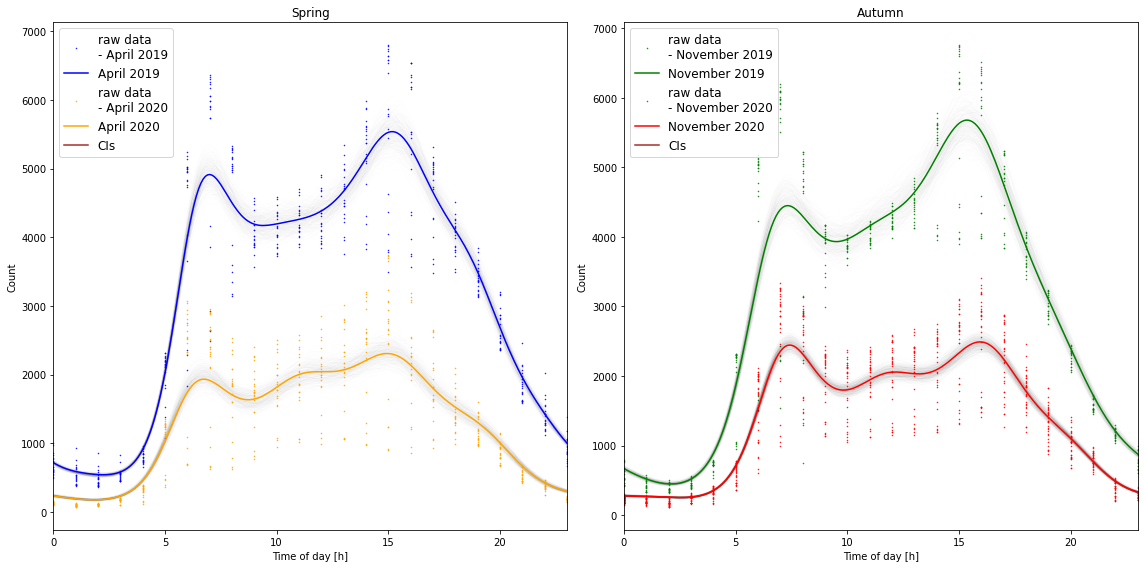

,time_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue
0,April 2019,gen_poisson,7.0,2498.82,3040.38,"[7.01, 15.22]","[4915.05, 5539.2]","[2367.1, 2643.26]","[2903.44, 3185.15]","[[6.69, 7.24], [14.8, 15.47]]","[[4455.79, 5370.14], [5271.38, 5827.58]]",7642.861869,7710.423089,-3805.430934,0.000000e+00
1,November 2019,gen_poisson,5.0,2616.01,3063.86,"[7.31, 15.32]","[4450.6, 5679.88]","[2534.05, 2755.01]","[2997.21, 3178.13]","[[6.98, 7.64], [15.13, 15.55]]","[[4268.56, 4783.49], [5532.38, 5932.02]]",7749.033291,7799.704207,-3862.516646,2.087399e-291
2,April 2020,gen_poisson,5.0,1065.90,1241.10,"[6.71, 11.91, 14.91]","[1933.02, 2042.0, 2307.0]","[956.44, 1186.33]","[1134.16, 1355.47]","[[6.46, 7.02], [10.8, 12.47], [14.43, 15.39]]","[[1755.06, 2163.21], [1917.78, 2205.11], [2073...",7302.537247,7353.231948,-3639.268623,4.967664e-222
3,November 2020,gen_poisson,5.0,1118.82,1371.95,"[7.41, 12.21, 15.92]","[2445.32, 2057.38, 2490.77]","[1071.47, 1195.55]","[1323.7, 1445.36]","[[7.28, 7.58], [11.69, 12.45], [15.66, 16.19]]","[[2298.99, 2649.08], [1971.91, 2169.13], [2374...",11679.045226,11735.716784,-5827.522613,0.000000e+00


In [14]:
df_covid = pd.read_csv(r'data\supp_file_1.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, models_type, ax_indices=[1, 2, 1, 2],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='figure1.pdf')
df_results=df_results[['time_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue']]
df_results.to_csv(r'results\supp_file_4.csv', index=False)
display(df_results)

## Only workdays

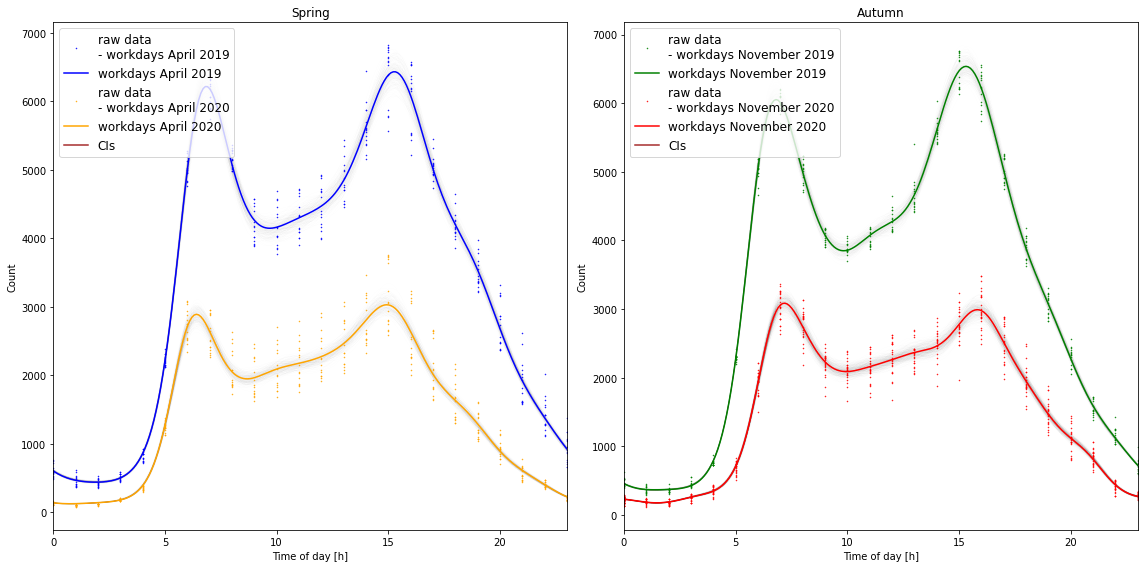

,time_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue
0,workdays April 2019,gen_poisson,7.0,2995.54,3437.10,"[6.81, 15.32]","[6217.27, 6432.65]","[2927.01, 3058.18]","[3368.78, 3500.86]","[[6.75, 6.92], [15.12, 15.42]]","[[6151.99, 6271.59], [6296.92, 6557.91]]",4905.742263,4967.919928,-2436.871132,0.000000e+00
1,workdays November 2019,gen_poisson,8.0,3084.91,3451.80,"[6.81, 15.32]","[6052.79, 6536.7]","[3038.26, 3131.38]","[3404.96, 3495.29]","[[6.81, 6.81], [15.22, 15.4]]","[[6005.94, 6106.88], [6443.75, 6626.14]]",4540.895793,4610.995044,-2252.447896,0.000000e+00
2,workdays April 2020,gen_poisson,7.0,1452.39,1579.27,"[6.41, 14.91]","[2892.09, 3031.66]","[1420.88, 1518.39]","[1545.29, 1644.28]","[[6.36, 6.45], [14.75, 15.17]]","[[2804.97, 2973.65], [2966.38, 3162.46]]",4713.124515,4775.302180,-2340.562258,9.466424e-292
3,workdays November 2020,gen_poisson,9.0,1454.55,1631.44,"[7.21, 15.82]","[3085.99, 2991.33]","[1422.46, 1497.69]","[1603.03, 1671.84]","[[7.1, 7.27], [15.63, 16.01]]","[[3025.75, 3169.28], [2917.63, 3062.77]]",7763.994124,7852.523893,-3861.997062,0.000000e+00


In [15]:
df_covid = pd.read_csv(r'data\supp_file_2.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, models_type, ax_indices=[1, 2, 1, 2],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='figure2.pdf')
df_results=df_results[['time_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue']]
df_results.to_csv(r'results\supp_file_5.csv', index=False)
display(df_results)

## Only weekends

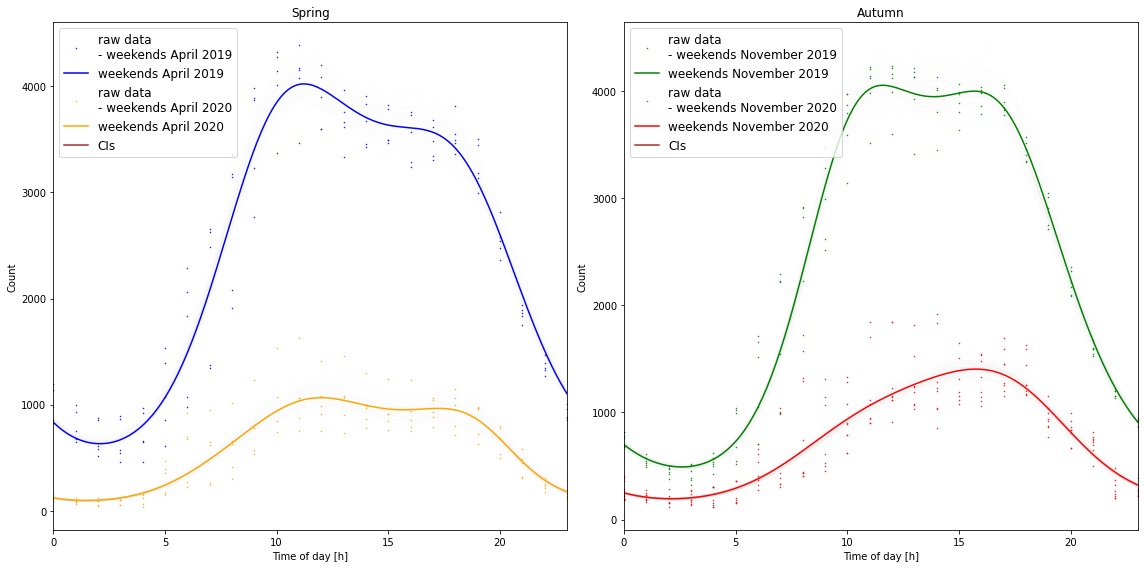

,time_period,model_type,n_components,amplitude,mesor,peaks,heights,amplitude_CIs,mesor_CIs,peaks_CIs,heights_CIs,AIC,BIC,log_likelihood,llr_pvalue
0,weekends April 2019,gen_poisson,2.0,1694.28,2326.76,[11.21],[4021.03],"[1629.08, 1771.94]","[2278.9, 2381.06]","[11.01, 11.52]","[3919.38, 4141.6]",1736.519665,1753.244616,-862.259833,1.506929e-73
1,weekends November 2019,gen_poisson,3.0,1781.03,2272.28,"[11.61, 15.72]","[4053.3, 3998.37]","[1745.68, 1839.2]","[2235.45, 2329.55]","[[11.01, 12.33], [15.11, 16.15]]","[[3958.06, 4177.27], [3942.49, 4053.31]]",2008.534228,2032.292735,-996.267114,3.561337e-106
2,weekends April 2020,gen_poisson,3.0,483.76,582.08,"[12.01, 17.22]","[1065.84, 965.17]","[431.81, 538.4]","[521.89, 639.83]","[[10.95, 12.85], [16.64, 17.98]]","[[949.25, 1177.87], [927.62, 1023.83]]",1537.066999,1559.366932,-760.533499,6.394160e-55
3,weekends November 2020,gen_poisson,2.0,604.73,799.73,[15.72],[1404.46],"[582.11, 637.8]","[772.73, 839.49]","[15.36, 16.08]","[1356.41, 1475.72]",2603.998018,2623.757847,-1295.999009,5.243251e-83


In [16]:
df_covid = pd.read_csv(r'..\data\supp_file_3.csv')
df_results = dproc.compare_by_component(df_covid, 'time_period', n_components, models_type, ax_indices=[1, 2, 1, 2],
                           ax_titles=['Spring', 'Autumn'], rows=1, cols=2,save_file_to='figure3.pdf')
df_results=df_results[['time_period','model_type','n_components','amplitude', 'mesor', 'peaks', 'heights','amplitude_CIs','mesor_CIs','peaks_CIs','heights_CIs','AIC','BIC','log_likelihood','llr_pvalue']]
df_results.to_csv(r'results\supp_file_6.csv', index=False)
display(df_results)